In [39]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = 'jeddah 2020-2022.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to inspect the data
display(data.head())

# Display information about the DataFrame, including data types
display(data.info())


,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,T2M,RH2M,PS,WD10M,WS10M,UVA,Wind Energy,Solar Energy
0,2020,1,1,4.37,4.67,23.43,55.94,99.94,181.44,3.64,10.09,213.654144,154.377
1,2020,1,2,4.57,4.64,24.26,61.31,99.95,165.06,2.91,10.69,170.346288,163.557
2,2020,1,3,4.35,4.65,24.78,63.88,100.08,215.56,4.15,10.41,242.825119,159.273
3,2020,1,4,3.69,4.55,22.98,56.69,100.09,342.94,7.04,8.88,414.470280,135.864
4,2020,1,5,4.82,4.91,20.76,54.00,100.13,316.12,6.37,11.12,378.008651,170.136


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               1096 non-null   int64  
 1   MO                 1096 non-null   int64  
 2   DY                 1096 non-null   int64  
 3   ALLSKY_SFC_SW_DWN  1096 non-null   float64
 4   CLRSKY_SFC_SW_DWN  1096 non-null   float64
 5   T2M                1096 non-null   float64
 6   RH2M               1096 non-null   float64
 7   PS                 1096 non-null   float64
 8   WD10M              1096 non-null   float64
 9   WS10M              1096 non-null   float64
 10  UVA                1096 non-null   float64
 11  Wind Energy        1096 non-null   float64
 12  Solar Energy       1096 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 111.4 KB


None

In [40]:
# Check for inconsistencies in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Column: {column}")
    display(data[column].value_counts())
    print("\n")
# Check for missing data
missing_data = data.isnull().sum()
display(missing_data[missing_data > 0])
# Identify outliers using IQR method for numerical columns
import numpy as np

numerical_columns = data.select_dtypes(include=['int64']).columns
for column in numerical_columns:
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    display(f"Column: {column}, Number of outliers: {len(outliers)}")


Series([], dtype: int64)

'Column: YEAR, Number of outliers: 0'

'Column: MO, Number of outliers: 0'

'Column: DY, Number of outliers: 0'

In [41]:
# Display basic statistical summaries for the 'data' variable
summary_stats = data.describe()
display(summary_stats)

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,T2M,RH2M,PS,WD10M,WS10M,UVA,Wind Energy,Solar Energy
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2020.999088,6.521898,15.732664,6.169845,6.444088,29.957710,47.024234,99.448385,215.144945,4.249553,14.704471,243.008505,224.978403
std,0.817055,3.450561,8.805388,1.235171,1.109000,4.470595,11.097031,0.440009,53.188034,1.233613,3.064292,71.166118,46.883666
min,2020.000000,1.000000,1.000000,0.770000,4.090000,18.120000,15.310000,98.370000,68.440000,1.820000,2.160000,104.506113,33.048000
25%,2020.000000,4.000000,8.000000,5.270000,5.390000,26.360000,39.380000,99.070000,174.060000,3.320000,12.365000,189.201514,189.184500
50%,2021.000000,7.000000,16.000000,6.380000,6.665000,31.045000,47.410000,99.460000,203.845000,3.970000,15.120000,225.855477,231.336000
75%,2022.000000,10.000000,23.000000,7.220000,7.392500,33.862500,54.560000,99.810000,252.357500,5.055000,17.380000,290.046708,265.914000
max,2022.000000,12.000000,31.000000,8.410000,8.520000,38.150000,75.500000,100.610000,343.560000,8.450000,20.040000,482.495604,306.612000


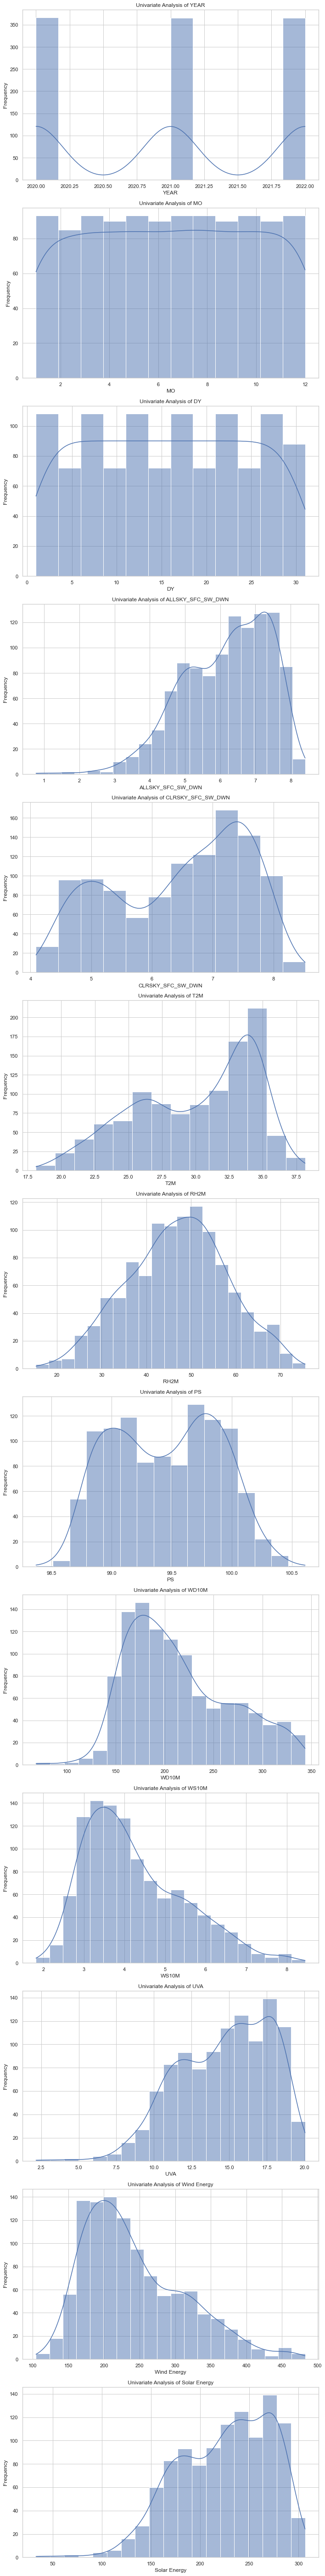

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(data.select_dtypes(include=['int64', 'float64']).columns), figsize=(10, 6 * len(data.columns)))

# Iterate through each numeric column
for i, column in enumerate(data.select_dtypes(include=['int64', 'float64']).columns):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Univariate Analysis of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


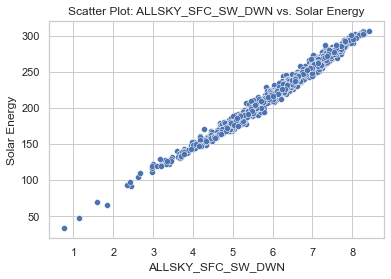

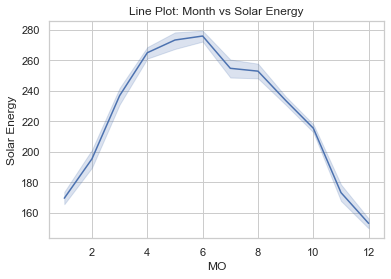

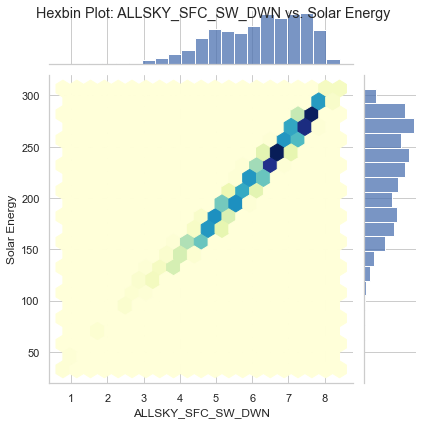

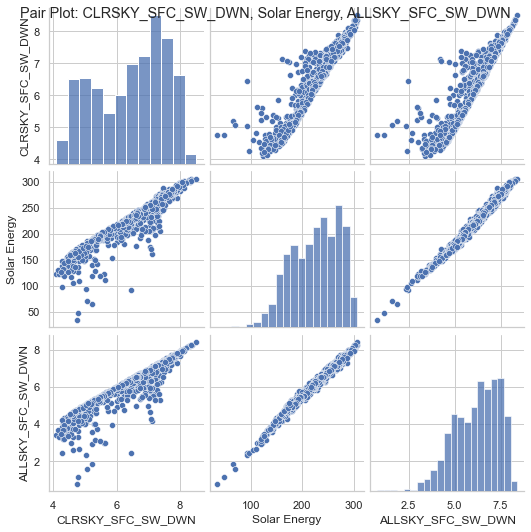

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='ALLSKY_SFC_SW_DWN', y='Solar Energy', data=data)
plt.title('Scatter Plot: ALLSKY_SFC_SW_DWN vs. Solar Energy')
plt.show()

# Sort the data by Age for a clearer line
data_sorted_by_monthes = data.sort_values(by='MO')
sns.lineplot(x='MO', y='Solar Energy', data=data_sorted_by_monthes)
plt.title('Line Plot: Month vs Solar Energy')
plt.show()

# sns.boxplot(x='T2M', y='Solar Energy', data=data)
# plt.title('Box Plot: PS vs. Solar Energy')
# plt.show()

# sns.violinplot(x='ALLSKY_SFC_SW_DWN', y='Solar Energy', data=data)
# plt.title('Violin Plot: ALLSKY_SFC_SW_DWN vs. Solar Energy')
# plt.xticks(rotation=45)
# plt.show()

sns.jointplot(x='ALLSKY_SFC_SW_DWN', y='Solar Energy', data=data, kind='hex', cmap='YlGnBu')
plt.suptitle('Hexbin Plot: ALLSKY_SFC_SW_DWN vs. Solar Energy')
plt.show()

sns.pairplot(data[['CLRSKY_SFC_SW_DWN', 'Solar Energy', 'ALLSKY_SFC_SW_DWN']])
plt.suptitle('Pair Plot: CLRSKY_SFC_SW_DWN, Solar Energy, ALLSKY_SFC_SW_DWN')
plt.show()


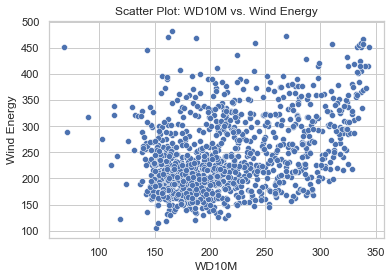

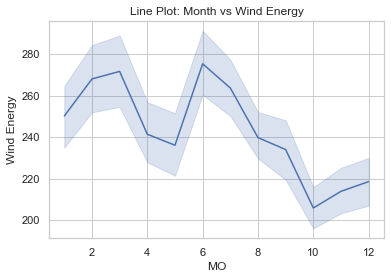

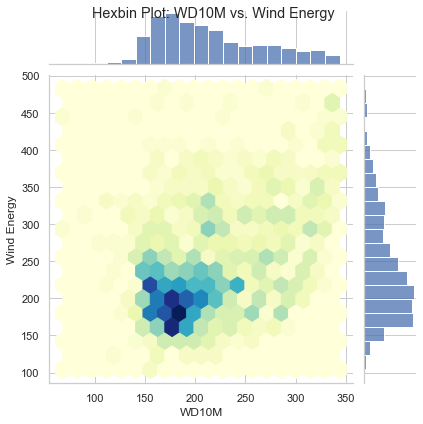

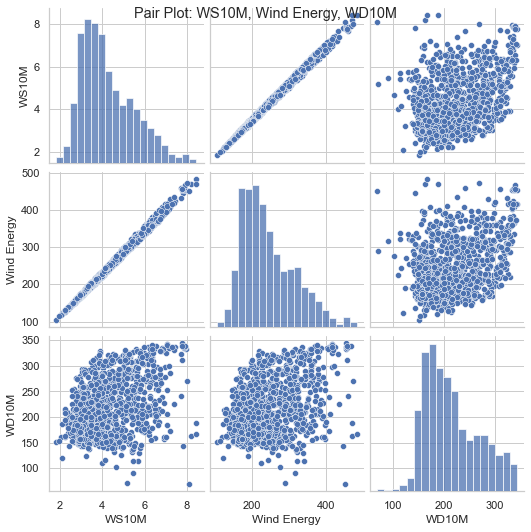

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'ALLSKY_SFC_SW_DWN' with 'WD10M' and 'Solar Energy' with 'Wind Energy'
sns.scatterplot(x='WD10M', y='Wind Energy', data=data)
plt.title('Scatter Plot: WD10M vs. Wind Energy')
plt.show()

data_sorted_by_monthes = data.sort_values(by='MO')
sns.lineplot(x='MO', y='Wind Energy', data=data_sorted_by_monthes)
plt.title('Line Plot: Month vs Wind Energy')
plt.show()

# sns.boxplot(x='T2M', y='Wind Energy', data=data)
# plt.title('Box Plot: PS vs. Wind Energy')
# plt.show()

# sns.violinplot(x='WD10M', y='Wind Energy', data=data)
# plt.title('Violin Plot: WD10M vs. Wind Energy')
# plt.xticks(rotation=45)
# plt.show()

sns.jointplot(x='WD10M', y='Wind Energy', data=data, kind='hex', cmap='YlGnBu')
plt.suptitle('Hexbin Plot: WD10M vs. Wind Energy')
plt.show()

sns.pairplot(data[['WS10M', 'Wind Energy', 'WD10M']])
plt.suptitle('Pair Plot: WS10M, Wind Energy, WD10M')
plt.show()


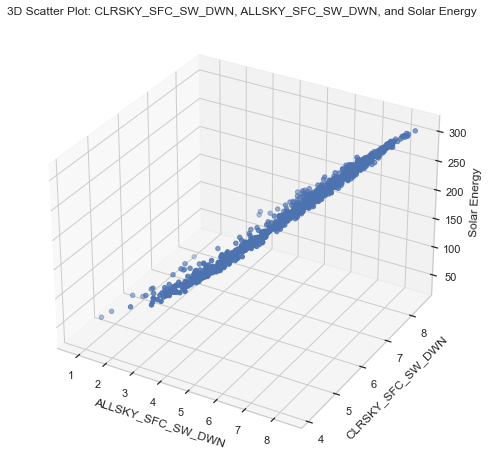

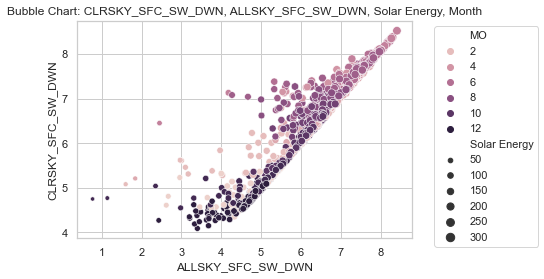

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


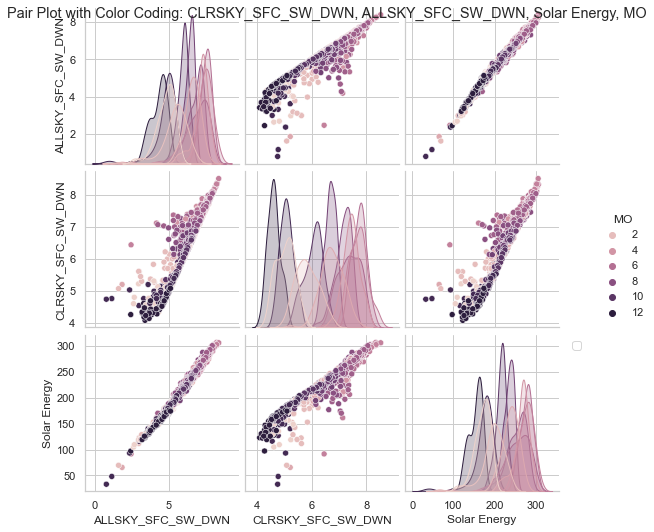

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['ALLSKY_SFC_SW_DWN'], data['CLRSKY_SFC_SW_DWN'], data['Solar Energy'])
ax.set_xlabel('ALLSKY_SFC_SW_DWN')
ax.set_ylabel('CLRSKY_SFC_SW_DWN')
ax.set_zlabel('Solar Energy')

plt.title('3D Scatter Plot: CLRSKY_SFC_SW_DWN, ALLSKY_SFC_SW_DWN, and Solar Energy')
plt.show()

import seaborn as sns

sns.scatterplot(x='ALLSKY_SFC_SW_DWN', y='CLRSKY_SFC_SW_DWN', size='Solar Energy', hue='MO', data=data)
plt.title('Bubble Chart: CLRSKY_SFC_SW_DWN, ALLSKY_SFC_SW_DWN, Solar Energy, Month')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

sns.pairplot(data[['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'Solar Energy', 'MO']], hue='MO')
plt.suptitle('Pair Plot with Color Coding: CLRSKY_SFC_SW_DWN, ALLSKY_SFC_SW_DWN, Solar Energy, MO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()


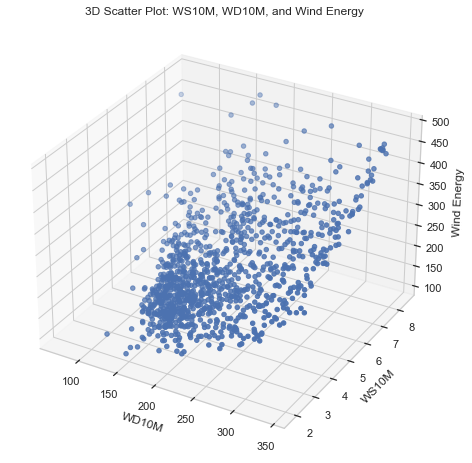

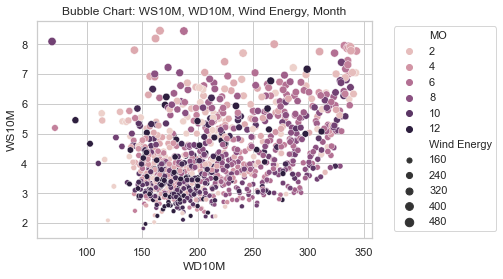

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


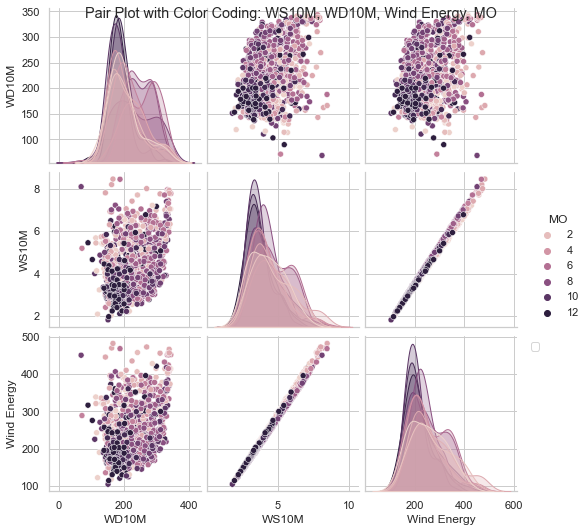

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['WD10M'], data['WS10M'], data['Wind Energy'])
ax.set_xlabel('WD10M')
ax.set_ylabel('WS10M')
ax.set_zlabel('Wind Energy')

plt.title('3D Scatter Plot: WS10M, WD10M, and Wind Energy')
plt.show()

import seaborn as sns

sns.scatterplot(x='WD10M', y='WS10M', size='Wind Energy', hue='MO', data=data)
plt.title('Bubble Chart: WS10M, WD10M, Wind Energy, Month')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

sns.pairplot(data[['WD10M', 'WS10M', 'Wind Energy', 'MO']], hue='MO')
plt.suptitle('Pair Plot with Color Coding: WS10M, WD10M, Wind Energy, MO')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()


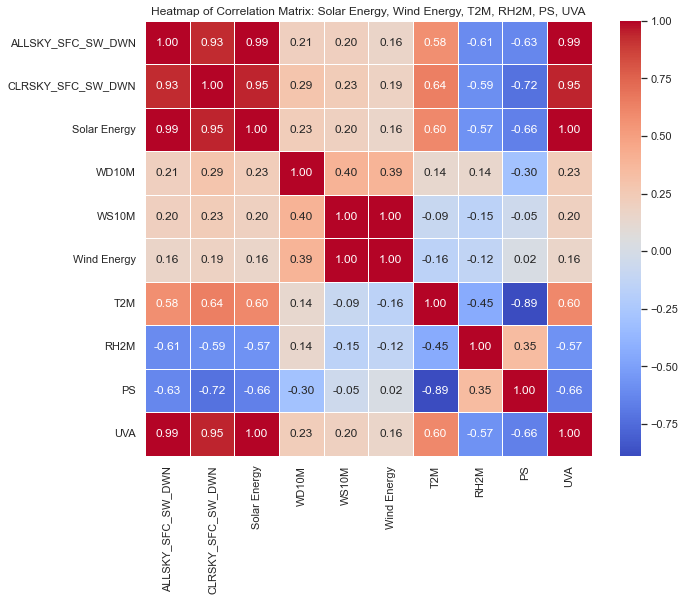

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the relevant columns
selected_columns = ['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'Solar Energy', 'WD10M', 'WS10M', 'Wind Energy', 'T2M', 'RH2M', 'PS', 'UVA']
numeric_data = data[selected_columns]

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix: Solar Energy, Wind Energy, T2M, RH2M, PS, UVA')
plt.show()


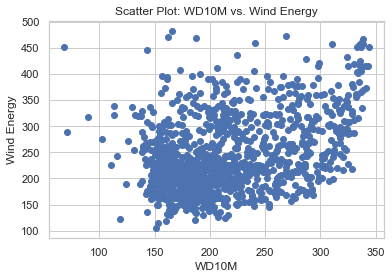

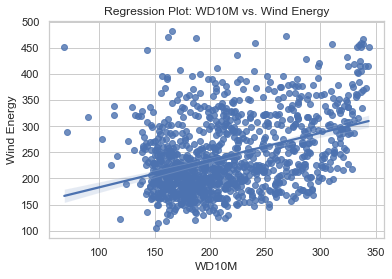

In [48]:
# Scatter plot
plt.scatter(data['WD10M'], data['Wind Energy'])  # Replace 'ALLSKY_SFC_SW_DWN' with 'WD10M' and 'Solar Energy' with 'Wind Energy'
plt.title('Scatter Plot: WD10M vs. Wind Energy')
plt.xlabel('WD10M')
plt.ylabel('Wind Energy')
plt.show()

# Regression plot
sns.regplot(x='WD10M', y='Wind Energy', data=data)  # Replace 'ALLSKY_SFC_SW_DWN' with 'WD10M' and 'Solar Energy' with 'Wind Energy'
plt.title('Regression Plot: WD10M vs. Wind Energy')
plt.show()



In [49]:
# Calculate the correlation 
corr = data.corr().abs()

top = corr[corr['Solar Energy'] > 0.5]

sorted_corr = top.sort_values(by=['Solar Energy'], ascending = False)

sorted_corr = sorted_corr['Solar Energy'].index

print('The top correlated input variables are: ',sorted_corr[1:].tolist())

display(data)


The top correlated input variables are:  ['Solar Energy', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'PS', 'T2M', 'RH2M']


,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,T2M,RH2M,PS,WD10M,WS10M,UVA,Wind Energy,Solar Energy
0,2020,1,1,4.37,4.67,23.43,55.94,99.94,181.44,3.64,10.09,213.654144,154.377
1,2020,1,2,4.57,4.64,24.26,61.31,99.95,165.06,2.91,10.69,170.346288,163.557
2,2020,1,3,4.35,4.65,24.78,63.88,100.08,215.56,4.15,10.41,242.825119,159.273
3,2020,1,4,3.69,4.55,22.98,56.69,100.09,342.94,7.04,8.88,414.470280,135.864
4,2020,1,5,4.82,4.91,20.76,54.00,100.13,316.12,6.37,11.12,378.008651,170.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2022,12,27,5.04,5.04,21.40,62.44,100.38,234.69,5.93,11.50,352.010251,175.950
1092,2022,12,28,5.13,5.09,21.84,48.25,100.25,102.75,4.66,11.38,275.851568,174.114
1093,2022,12,29,3.77,4.70,23.60,55.56,100.14,150.88,4.18,8.93,245.700248,136.629
1094,2022,12,30,3.45,4.24,22.33,75.50,100.15,163.06,4.11,8.23,242.648236,125.919


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for feature in sorted_corr:
    # Extract the feature column
    X = data[[feature]]

    # Create a quadratic feature
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_quad = poly.fit_transform(X)

    # Fit a linear regression model
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X_quad, data['Solar Energy'])

    # Extract coefficients
    best_b1 = reg.coef_[0]
    best_b2 = reg.coef_[1]
    best_b0 = reg.intercept_

    print(f'The values for B1, B2, and B0 for: [{feature}]')
    print(f'The best values for B1 is: {np.round(best_b1, 2)}')
    print(f'The best values for B2 is: {np.round(best_b2, 2)}')
    print(f'The best values for B0 is: {np.round(best_b0, 2)}')
    print('-------------------------------------------')


The values for B1, B2, and B0 for: [UVA]
The best values for B1 is: 15.3
The best values for B2 is: 0.0
The best values for B0 is: -0.0
-------------------------------------------
The values for B1, B2, and B0 for: [Solar Energy]
The best values for B1 is: 1.0
The best values for B2 is: 0.0
The best values for B0 is: -0.0
-------------------------------------------
The values for B1, B2, and B0 for: [ALLSKY_SFC_SW_DWN]
The best values for B1 is: 26.21
The best values for B2 is: 1.0
The best values for B0 is: 23.76
-------------------------------------------
The values for B1, B2, and B0 for: [CLRSKY_SFC_SW_DWN]
The best values for B1 is: 26.7
The best values for B2 is: 1.07
The best values for B0 is: 7.2
-------------------------------------------
The values for B1, B2, and B0 for: [PS]
The best values for B1 is: 5626.62
The best values for B2 is: -28.64
The best values for B0 is: -276076.91
-------------------------------------------
The values for B1, B2, and B0 for: [T2M]
The best v

In [51]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming data is your DataFrame
X = data[['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'PS', 'T2M', 'RH2M']].values
y = data.iloc[:, -1].values

# Generate Train - Test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).flatten()

# The scaled data can now be used for model training and testing


In [52]:
#OLs
from sklearn.linear_model import LinearRegression
ols_reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
ols_y = ols_reg.predict(X_test)
print('The Coefficient are: ', ols_reg.coef_)

The Coefficient are:  [32.77672371  6.93398302 -0.40911943  0.24444221  0.244725  ]


In [53]:
## Ridge
from sklearn.linear_model import RidgeCV

reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
               fit_intercept=False,cv=10).fit(X_train, y_train)

y_pred2 = reg2.predict(X_test)

print('The Coefficient are:', reg2.coef_)

The Coefficient are: [32.77654129  6.93415499 -0.40911782  0.24444093  0.24472285]


In [54]:
## Lasso

from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)

y_pred3 = reg3.predict(X_test)
print('The Coefficient are:', reg3.coef_)

The Coefficient are: [32.90489456  6.80847743 -0.41039106  0.2465435   0.24639608]


C:\Users\Mohammed\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.223e+03, tolerance: 4.104e+03
  model = cd_fast.enet_coordinate_descent(


In [55]:
from sklearn.metrics import mean_squared_error

ols = mean_squared_error(y_test, ols_y) 

reg_MSE = mean_squared_error(y_test, y_pred2)

lasso_MSE = mean_squared_error(y_test, y_pred3)

print('The MSE using OLS is: ', ols)
print('\n')
print('The MSE using Ridge is: ', reg_MSE)
print('\n')
print('The MSE using Lasso is: ', lasso_MSE)

The MSE using OLS is:  13.376789595923066


The MSE using Ridge is:  13.376748807941798


The MSE using Lasso is:  13.406050316278728


In [58]:
# Assuming linear_model is your trained Linear Regression model

# New data for prediction
new_data = np.array([[4.34, 4.47, 100.12, 24.73, 77]])

# Make predictions on the new data using Linear Regression
predictions_linear = reg2.predict(new_data)

# Print or use the predictions as needed
print("Predictions on new data using Linear Regression:", predictions_linear)


Predictions on new data using Linear Regression: [157.17366966]
